<a href="https://colab.research.google.com/github/AmindaUdayanga/Feature-Engineered-Rice-yield-Prediction-based-on-Weather-Data/blob/master/feature_engineered_Kurunegala_total.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from array import *
import math

##All datasets

In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/ML_research/Am.csv')
dataset1="Anuradhapura maha kannaya"

In [4]:
df2 = pd.read_csv('/content/drive/MyDrive/ML_research/Ay.csv')
dataset2="Anuradhapura yala kannaya"

In [5]:
df3 = pd.read_csv('/content/drive/MyDrive/ML_research/Km.csv')
dataset3="Kurunegala maha kannaya"

In [6]:
df4 = pd.read_csv('/content/drive/MyDrive/ML_research/Ky.csv')
dataset4="Kurunegala yala kannaya"

In [7]:
df5 = pd.read_csv('/content/drive/MyDrive/ML_research/total datasets/Kurunegala_total.csv')
dataset5="Kurunegala full dataset"

In [8]:
df = df5
df

dataset=dataset5
print(df)


    year           X1         X2         X3         X4   X5  X6  X7   X8  X9  \
0   1982   846.500000  30.708822  33.408333  28.275714  104   8  12   68  56   
1   1983   743.900000  31.037928  33.638000  27.441667  102  15   6   62  62   
2   1984   584.850000  30.663998  33.600000  28.254091  100   8  16   68  56   
3   1985   867.250000  30.237684  33.788333  27.608077   92   9  23   67  56   
4   1986   298.300000  31.018921  33.625000  28.534091  112   2  10   61  63   
5   1987   790.850000  30.910661  33.602778  27.737500  109  10   5   54  70   
6   1988   561.946260  30.869691  33.430000  26.901667  109   5  10   60  63   
7   1989   782.805882  30.588809  33.350000  27.548901  108   6  10   66  57   
8   1990   722.000000  30.712266  34.071212  28.035417   95   7  21   56  68   
9   1991   656.250000  30.635326  33.665217  28.338508   92  12  20   64  59   
10  1992   560.350000  30.522671  33.537500  28.203843   91   4  28   85  38   
11  1993   828.400000  30.551937  33.585

##pre processing

In [9]:
#Delete row whose column value is equal to 0
df = df.drop(df.index[df['X2'] == 0])
df = df.drop(df.index[df['X3'] == 0])
df = df.drop(df.index[df['X4'] == 0])
df = df.drop(df.index[df['X10'] == 0])
df = df.drop(df.index[df['X11'] == 0])
df.size

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
print(df)

    year           X1         X2         X3         X4   X5  X6  X7   X8  X9  \
0   1982   846.500000  30.708822  33.408333  28.275714  104   8  12   68  56   
1   1983   743.900000  31.037928  33.638000  27.441667  102  15   6   62  62   
2   1984   584.850000  30.663998  33.600000  28.254091  100   8  16   68  56   
3   1985   867.250000  30.237684  33.788333  27.608077   92   9  23   67  56   
4   1986   298.300000  31.018921  33.625000  28.534091  112   2  10   61  63   
5   1987   790.850000  30.910661  33.602778  27.737500  109  10   5   54  70   
6   1988   561.946260  30.869691  33.430000  26.901667  109   5  10   60  63   
7   1989   782.805882  30.588809  33.350000  27.548901  108   6  10   66  57   
8   1990   722.000000  30.712266  34.071212  28.035417   95   7  21   56  68   
9   1991   656.250000  30.635326  33.665217  28.338508   92  12  20   64  59   
10  1992   560.350000  30.522671  33.537500  28.203843   91   4  28   85  38   
11  1993   828.400000  30.551937  33.585

<Axes: >

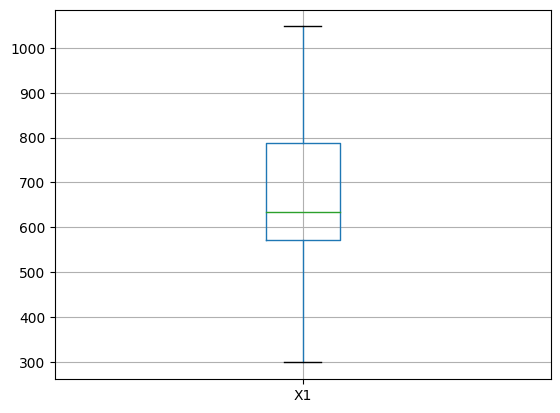

In [10]:
df.boxplot(column=['X1'])

<Axes: >

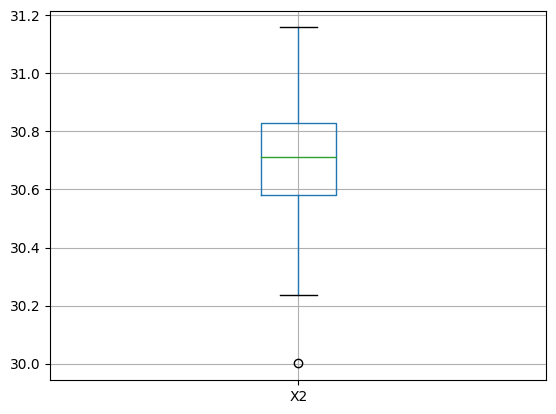

In [11]:
df.boxplot(column=['X2'])


<Axes: >

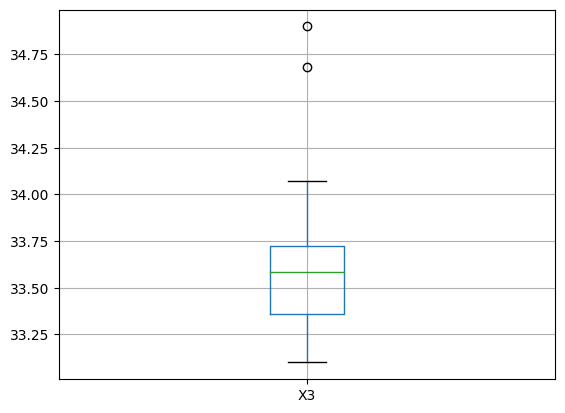

In [12]:
df.boxplot(column=['X3'])


<Axes: >

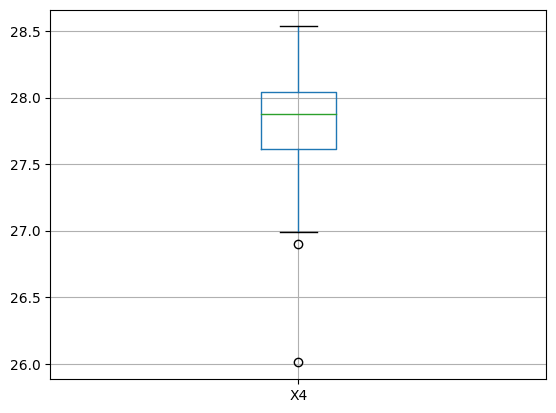

In [13]:
df.boxplot(column=['X4'])


<Axes: >

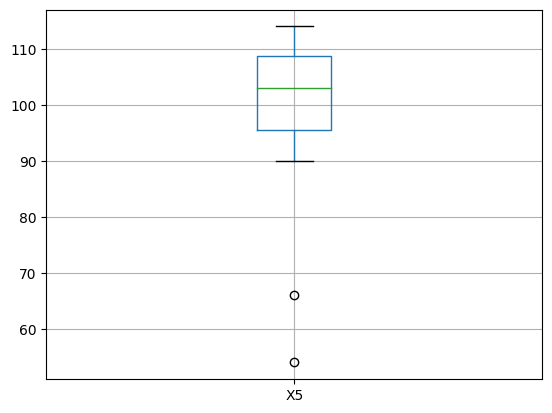

In [14]:
df.boxplot(column=['X5'])


<Axes: >

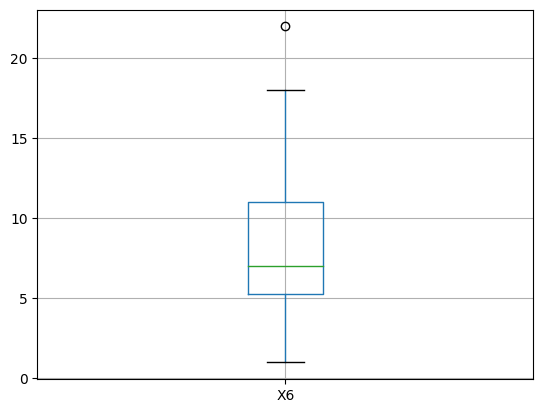

In [15]:
df.boxplot(column=['X6'])


<Axes: >

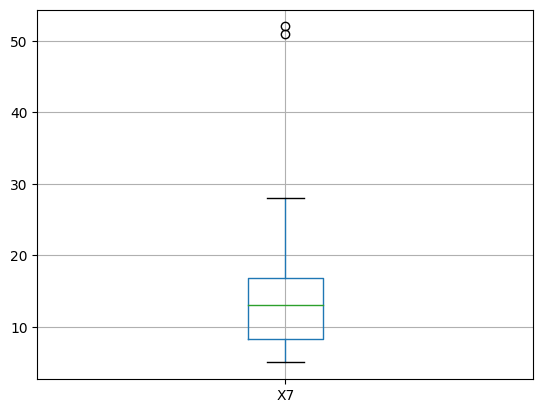

In [16]:
df.boxplot(column=['X7'])


<Axes: >

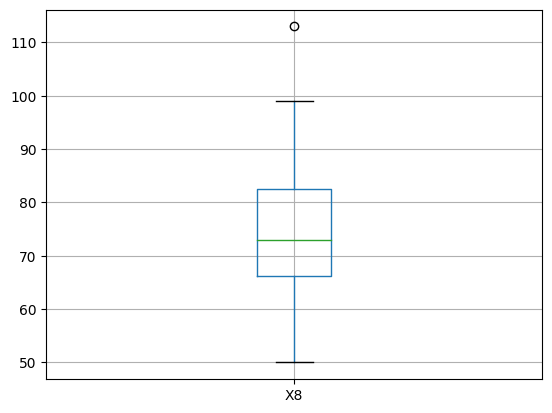

In [17]:
df.boxplot(column=['X8'])


<Axes: >

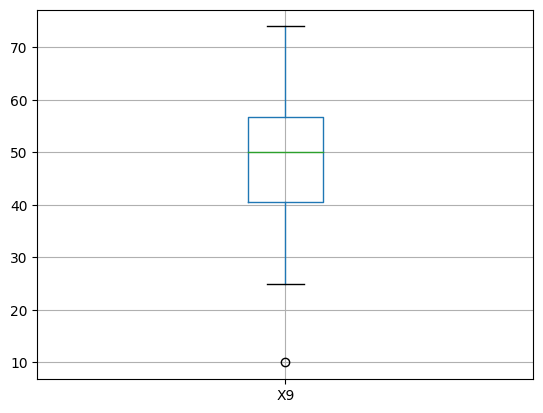

In [18]:
df.boxplot(column=['X9'])


<Axes: >

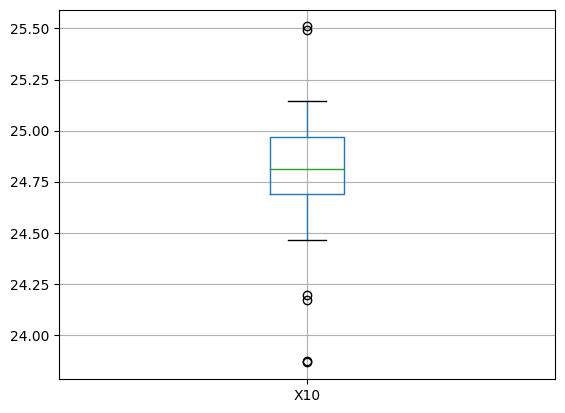

In [19]:
df.boxplot(column=['X10'])


<Axes: >

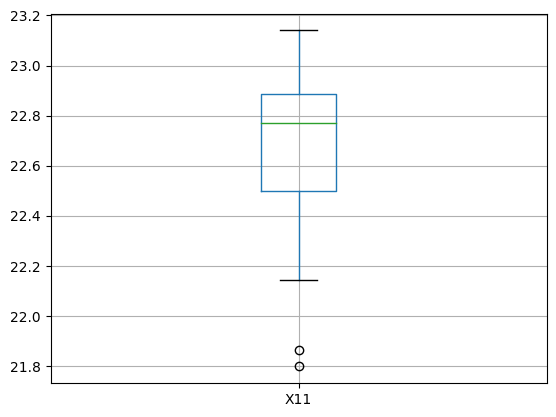

In [20]:
df.boxplot(column=['X11'])

In [21]:
df['X1'] = np.where(df['X1'] < (df['X1'].quantile(0.10)), (df['X1'].quantile(0.10)),df['X1'])
df['X1'] = np.where(df['X1'] >(df['X1'].quantile(0.90)), (df['X1'].quantile(0.90)),df['X1'])

df['X2'] = np.where(df['X2'] < (df['X2'].quantile(0.10)), (df['X2'].quantile(0.10)),df['X2'])
df['X2'] = np.where(df['X2'] >(df['X2'].quantile(0.90)), (df['X2'].quantile(0.90)),df['X2'])

df['X3'] = np.where(df['X3'] < (df['X3'].quantile(0.10)), (df['X3'].quantile(0.10)),df['X3'])
df['X3'] = np.where(df['X3'] >(df['X3'].quantile(0.90)), (df['X3'].quantile(0.90)),df['X3'])

df['X4'] = np.where(df['X4'] < (df['X4'].quantile(0.10)), (df['X4'].quantile(0.10)),df['X4'])
df['X4'] = np.where(df['X4'] >(df['X4'].quantile(0.90)), (df['X4'].quantile(0.90)),df['X4'])

df['X5'] = np.where(df['X5'] < (df['X5'].quantile(0.10)), (df['X5'].quantile(0.10)),df['X5'])
df['X5'] = np.where(df['X5'] >(df['X5'].quantile(0.90)), (df['X5'].quantile(0.90)),df['X5'])

df['X6'] = np.where(df['X6'] < (df['X6'].quantile(0.10)), (df['X6'].quantile(0.10)),df['X6'])
df['X6'] = np.where(df['X6'] >(df['X6'].quantile(0.90)), (df['X6'].quantile(0.90)),df['X6'])

df['X7'] = np.where(df['X7'] < (df['X7'].quantile(0.10)), (df['X7'].quantile(0.10)),df['X7'])
df['X7'] = np.where(df['X7'] >(df['X7'].quantile(0.90)), (df['X7'].quantile(0.90)),df['X7'])

df['X8'] = np.where(df['X8'] < (df['X8'].quantile(0.10)), (df['X8'].quantile(0.10)),df['X8'])
df['X8'] = np.where(df['X8'] >(df['X8'].quantile(0.90)), (df['X8'].quantile(0.90)),df['X8'])

df['X9'] = np.where(df['X9'] < (df['X9'].quantile(0.10)), (df['X9'].quantile(0.10)),df['X9'])
df['X9'] = np.where(df['X9'] >(df['X9'].quantile(0.90)), (df['X9'].quantile(0.90)),df['X9'])

df['X10'] = np.where(df['X10'] < (df['X10'].quantile(0.10)), (df['X10'].quantile(0.10)),df['X10'])
df['X10'] = np.where(df['X10'] >(df['X10'].quantile(0.90)), (df['X10'].quantile(0.90)),df['X10'])

df['X11'] = np.where(df['X11'] < (df['X11'].quantile(0.10)), (df['X11'].quantile(0.10)),df['X11'])
df['X11'] = np.where(df['X11'] >(df['X11'].quantile(0.90)), (df['X11'].quantile(0.90)),df['X11'])


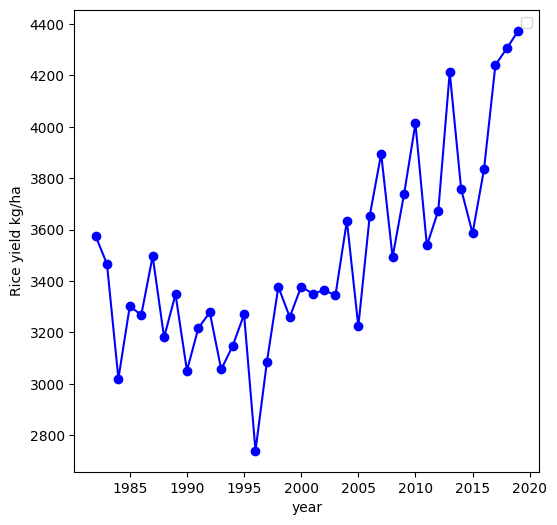

In [22]:
plt.figure(figsize=(6,6))
plt.scatter(df['year'], df['prod'],color='b')
plt.plot(df['year'],df['prod'],color='b')

plt.xlabel("year")
plt.ylabel("Rice yield kg/ha")
plt.legend()
plt.show()

In [23]:

def bias_value(y_test, y_pred):
  ytest_list = list(y_test.values)
  diff=0.0
  avg_diff=0.0
  for i in range(0,len(ytest_list)):
    diff=diff+ytest_list[i]-y_pred[i]

  avg_diff=diff/len(ytest_list)
  return avg_diff

data = {'Method': ['Linear Regression','SVR','MLP','KNN','Random Forest'],
        'RMSE test': [0,0,0,0,0],
        'RMSE train': [0,0,0,0,0],
        'RRMSE test': [0,0,0,0,0],
        'RRMSE train': [0,0,0,0,0],
        'MAE test': [0,0,0,0,0],
        'MAE train': [0,0,0,0,0],
        'R2_score test': [0,0,0,0,0],
        'R2_score train': [0,0,0,0,0],
        'Bias test': [0,0,0,0,0],
        'Bias train': [0,0,0,0,0],
        }
test_acc = {'Method': ['Linear Regression','SVR','MLP','KNN','Random Forest'],
        'RMSE test': [0,0,0,0,0],
        'RRMSE test': [0,0,0,0,0],
        'MAE test': [0,0,0,0,0],
        'R2_score test': [0,0,0,0,0],
        'Bias test': [0,0,0,0,0]
        }

df_train = pd.DataFrame(data, columns = ['Method', 'RMSE test','RMSE train','RRMSE test','RRMSE train','MAE test','MAE train','R2_score test','R2_score train','Bias test','Bias train'])

test_percentage = 0.3
test_size = math.floor(len(df.index)*test_percentage)


df_train = df[:-test_size]
df_test = df[-test_size:]


In [24]:
print(df_train)

    year          X1         X2         X3         X4     X5    X6    X7  \
0   1982  846.500000  30.708822  33.408333  28.275714  104.0   8.0  12.0   
1   1983  743.900000  30.976844  33.638000  27.441667  102.0  15.0   6.0   
2   1984  584.850000  30.663998  33.600000  28.254091  100.0   8.0  16.0   
3   1985  852.725000  30.496253  33.788333  27.608077   92.0   9.0  23.0   
4   1986  445.070000  30.976844  33.625000  28.321675  110.3   3.4  10.0   
5   1987  790.850000  30.910661  33.602778  27.737500  109.0  10.0   6.0   
6   1988  561.946260  30.869691  33.430000  27.110641  109.0   5.0  10.0   
7   1989  782.805882  30.588809  33.350000  27.548901  108.0   6.0  10.0   
8   1990  722.000000  30.712266  33.937705  28.035417   95.0   7.0  21.0   
9   1991  656.250000  30.635326  33.665217  28.321675   92.0  12.0  20.0   
10  1992  560.350000  30.522671  33.537500  28.203843   91.0   4.0  23.0   
11  1993  828.400000  30.551937  33.585714  28.314462  101.0   4.0  19.0   
12  1994  59

Feature: 1, Score: 0.11195
Feature: 2, Score: 0.02673
Feature: 3, Score: 0.06378
Feature: 4, Score: 0.32620
Feature: 5, Score: 0.01613
Feature: 6, Score: 0.05878
Feature: 7, Score: 0.03375
Feature: 8, Score: 0.13534
Feature: 9, Score: 0.08021
Feature: 10, Score: 0.04161
Feature: 11, Score: 0.10551


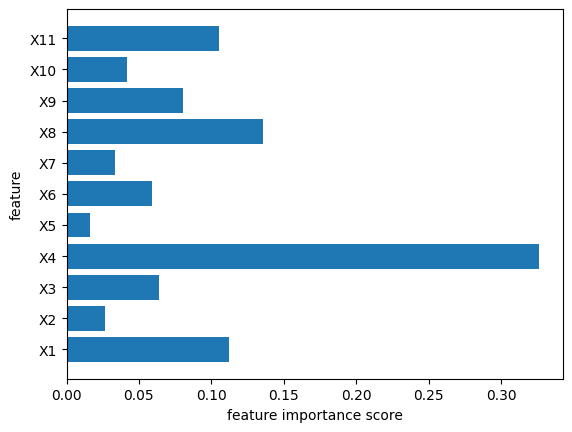

[[0, 0.11194987440881374], [1, 0.02673340857655989], [2, 0.06378412992544016], [3, 0.32619686514929697], [4, 0.016133408301267107], [5, 0.058776386755806265], [6, 0.03375262846963259], [7, 0.13534312220863973], [8, 0.08020678368066074], [9, 0.04161177519592974], [10, 0.10551161732795318]]


In [25]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

X=df_train.drop(['year','prod'], axis=1)
y=df_train['prod']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=42)

feature_names = [f"feature {i}" for i in range(X.shape[1])]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(X_train)
X_test = scaler.transform(x_test)
x_test = pd.DataFrame(X_test)

rf = RandomForestRegressor(random_state=42)

rf.fit(x_train,y_train)

importance = rf.feature_importances_
# summarize feature importance and assign them to an array 'arr' with the feature index
arr = [[0 for x in range(2)] for y in range(11)]
for i,v in enumerate(importance):
	arr[i][0] = i
	arr[i][1] = v
	print('Feature: %0d, Score: %.5f' % (i+1,v))
# plot feature importance
plt.barh([f'X{x}' for x in range(1,len(importance)+1)], importance)
plt.xlabel("feature importance score")
plt.ylabel("feature")
plt.show()

print(arr)


[[3, 0.32619686514929697], [7, 0.13534312220863973], [0, 0.11194987440881374], [10, 0.10551161732795318], [8, 0.08020678368066074], [2, 0.06378412992544016], [5, 0.058776386755806265], [9, 0.04161177519592974], [6, 0.03375262846963259], [1, 0.02673340857655989], [4, 0.016133408301267107]]


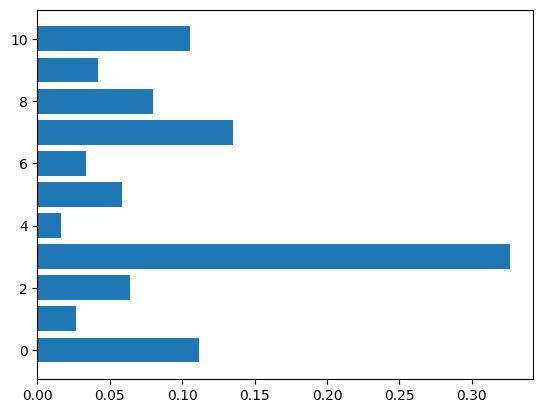

In [26]:
arr.sort(key=lambda row: (row[1]), reverse=True)
print(arr)
plt.barh([x[0] for x in arr],[x[1] for x in arr])
plt.show()


Feature: 5, Score: 0.01613
Feature: 2, Score: 0.02673
Feature: 7, Score: 0.03375
Feature: 10, Score: 0.04161
Feature: 6, Score: 0.05878
Feature: 3, Score: 0.06378
Feature: 9, Score: 0.08021
Feature: 11, Score: 0.10551
Feature: 1, Score: 0.11195
Feature: 8, Score: 0.13534
Feature: 4, Score: 0.32620


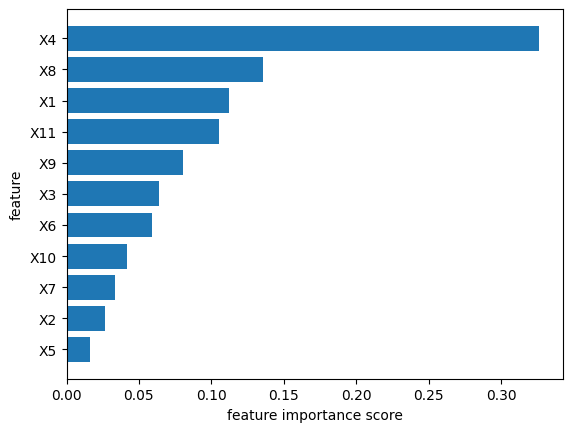

In [27]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

X=df_train.drop(['year','prod'], axis=1)
y=df_train['prod']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=42)

feature_names = [f"feature {i}" for i in range(X.shape[1])]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(X_train)
X_test = scaler.transform(x_test)
x_test = pd.DataFrame(X_test)

rf = RandomForestRegressor(random_state=42)

rf.fit(x_train,y_train)

importance = rf.feature_importances_
# summarize feature importance and assign them to an list 'list_' with the feature index
list_ = [[0 for x in range(2)] for y in range(11)]
dic = {}
indexes=[]
values=[]
for i,v in enumerate(importance):
	dic[i+1] = v

# plot feature importance
sorted_list = sorted(dic.items(), key=lambda x:x[1],reverse=False)

sorted_dic = dict()
for item in sorted_list:
	sorted_dic[item[0]]=item[1]
	indexes.append(item[0])
	values.append(item[1])
	print('Feature: %0d, Score: %.5f' % (item[0],item[1]))
plt.barh([f'X{x}' for x in indexes], [val for val in  values])
plt.xlabel("feature importance score")
plt.ylabel("feature")
plt.savefig("AM_features.jpg",dpi=1200)
plt.show()


In [28]:
acc_array=list()
#feature_array=list()


cv = KFold(n_splits=5, shuffle=True, random_state=42)

for n in range(1,12):
  num_of_features = n
  #print(num_of_features)
  selected = [0 for y in range(num_of_features)]
  for i in range(num_of_features):
    selected[i] = sorted(arr,key=lambda row: (row[1]), reverse=True)[i]
  print(selected)
  selected_features_list = [0 for y in range(num_of_features)]
  for i in range(num_of_features):
    selected_features_list[i] = df_train.columns[selected[i][0]+1]
  print(selected_features_list)

[[3, 0.32619686514929697]]
['X4']
[[3, 0.32619686514929697], [7, 0.13534312220863973]]
['X4', 'X8']
[[3, 0.32619686514929697], [7, 0.13534312220863973], [0, 0.11194987440881374]]
['X4', 'X8', 'X1']
[[3, 0.32619686514929697], [7, 0.13534312220863973], [0, 0.11194987440881374], [10, 0.10551161732795318]]
['X4', 'X8', 'X1', 'X11']
[[3, 0.32619686514929697], [7, 0.13534312220863973], [0, 0.11194987440881374], [10, 0.10551161732795318], [8, 0.08020678368066074]]
['X4', 'X8', 'X1', 'X11', 'X9']
[[3, 0.32619686514929697], [7, 0.13534312220863973], [0, 0.11194987440881374], [10, 0.10551161732795318], [8, 0.08020678368066074], [2, 0.06378412992544016]]
['X4', 'X8', 'X1', 'X11', 'X9', 'X3']
[[3, 0.32619686514929697], [7, 0.13534312220863973], [0, 0.11194987440881374], [10, 0.10551161732795318], [8, 0.08020678368066074], [2, 0.06378412992544016], [5, 0.058776386755806265]]
['X4', 'X8', 'X1', 'X11', 'X9', 'X3', 'X6']
[[3, 0.32619686514929697], [7, 0.13534312220863973], [0, 0.11194987440881374], [1

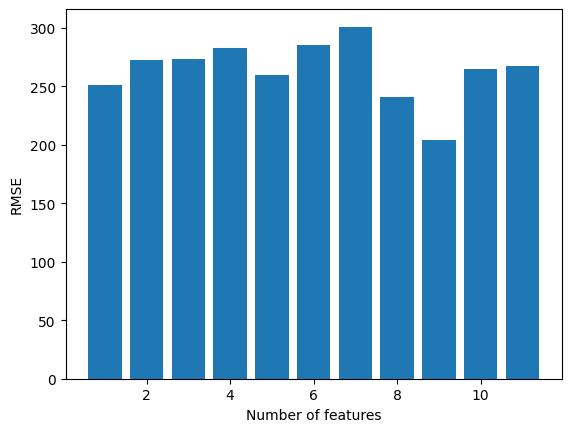

['X4', 'X8', 'X1', 'X11', 'X9', 'X3', 'X6', 'X10', 'X7']
204.0914


In [29]:

acc_array=list()
#feature_array=list()


cv = KFold(n_splits=5, shuffle=True, random_state=42)
min=2000
selected_features_final=list()
for n in range(1,12):
  num_of_features = n
  selected = [[0 for x in range(2)] for y in range(num_of_features)]
  #copy the selected most important n features' indices and their importance to 'selected' array
  for i in range(num_of_features):
    selected[i] = sorted(arr,key=lambda row: (row[1]), reverse=True)[i]
  #assign selected feature columns in 'X' dataset to new dataset 'selected_features'
  selected_features = pd.DataFrame()
  selected_features_list = [0 for y in range(num_of_features)]
  for i in range(num_of_features):
    selected_features[i] = df_train.iloc[:, selected[i][0]+1]
    #print(selected_features)
    selected_features_list[i] = df_train.columns[selected[i][0]+1]
  #print(selected_features_list)
  rmse_test_arr = []
  rrmse_test_arr =[]
  r2_test_arr= []
  mae_test_arr = []

  rmse_train_arr = []
  rrmse_train_arr =[]
  r2_train_arr= []
  mae_train_arr = []

  bias_test_arr = []
  bias_train_arr = []
  #print(selected_features[i])
  for tr, tt in cv.split(df_train): #tr,tt are indexes
    x_train, x_test = selected_features[i].iloc[tr], selected_features[i].iloc[tt]
    y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
    #print(tr,tt)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(pd.DataFrame(x_train))
    X_test = scaler.transform(pd.DataFrame(x_test))
    model =  RandomForestRegressor(n_estimators = 1000, random_state = 42).fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    r2_test=r2_score(y_test,y_pred)
    r2_train=r2_score(y_train,y_pred_train)
    #print(r2_test)
    #print(r2_train)
    r2_test_arr.append(r2_test)
    r2_train_arr.append(r2_train)

    rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    #print("\nRMSE test: ", rmse_test)
    rmse_test_arr.append(rmse_test)

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    #print("\nRRMSE test: ", rrmse_test,"%")
    rrmse_test_arr.append(rrmse_test)

    rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
    #print("\nRMSE train: ", rmse_train)
    rmse_train_arr.append(rmse_train)

    rrmse_train = format(float(rmse_train*100/np.mean(y_train)),'.2f')
    #print("\nRRMSE train: ", rrmse_train,"%")
    rrmse_train_arr.append(rrmse_train)


    mae_test = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
    #print("\nMAE Test: ", mae_test)
    mae_test_arr.append(mae_test)
    mae_train = float(format(mean_absolute_error(y_train, y_pred_train), '.3f'))
    #print("\nMAE Train: ", mae_train)
    mae_train_arr.append(mae_train)

    #print("\nBias Test: \n", bias_value(y_test,y_pred))
    bias_test_arr.append(bias_value(y_test,y_pred))
    #print("\nBias Train: \n", bias_value(y_train, y_pred_train))
    bias_train_arr.append(bias_value(y_train, y_pred_train))

  acc_array.append(np.mean(np.array(rmse_test_arr).astype(np.float64)))
  if(min > np.mean(np.array(rmse_test_arr).astype(np.float64))):
    min=np.mean(np.array(rmse_test_arr).astype(np.float64))
    selected_features_final = selected_features_list
plt.bar(np.arange(1,12), acc_array)
plt.xlabel("Number of features")
plt.ylabel("RMSE")
plt.show()
print(selected_features_final)
print(min)

##LinearRegression

[ 1  2  3  4  5  6  7 10 12 14 15 16 17 18 19 20 22 23 24 25 26] [ 0  8  9 11 13 21]
[ 0  2  3  5  6  7  8  9 10 11 13 14 15 18 19 20 21 22 23 25 26] [ 1  4 12 16 17 24]
[ 0  1  4  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 23 24 25 26] [ 2  3  5 15 22]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 21 22 24] [18 20 23 25 26]
[ 0  1  2  3  4  5  8  9 11 12 13 15 16 17 18 20 21 22 23 24 25 26] [ 6  7 10 14 19]
[209.182, 272.971, 264.135, 292.81, 407.345]
289.2886


<BarContainer object of 5 artists>

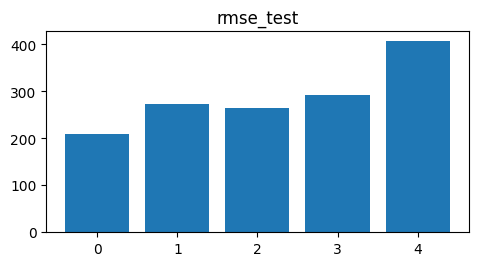

In [30]:
cv = KFold(n_splits=5, shuffle=True,random_state=42)

rmse_test_arr = []
rrmse_test_arr =[]
r2_test_arr= []
mae_test_arr = []

rmse_train_arr = []
rrmse_train_arr =[]
r2_train_arr= []
mae_train_arr = []

bias_test_arr = []
bias_train_arr = []

for tr, tt in cv.split(df_train): #tr,tt are indexes
    x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
    y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
    print(tr,tt)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(x_train)
    X_test = scaler.transform(x_test)
    model = LinearRegression().fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    r2_test=r2_score(y_test,y_pred)
    r2_train=r2_score(y_train,y_pred_train)
    #print(r2_test)
    #print(r2_train)
    r2_test_arr.append(r2_test)
    r2_train_arr.append(r2_train)

    rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    #print("\nRMSE test: ", rmse_test)
    rmse_test_arr.append(rmse_test)

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    #print("\nRRMSE test: ", rrmse_test,"%")
    rrmse_test_arr.append(rrmse_test)

    rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
    #print("\nRMSE train: ", rmse_train)
    rmse_train_arr.append(rmse_train)

    rrmse_train = format(float(rmse_train*100/np.mean(y_train)),'.2f')
    #print("\nRRMSE train: ", rrmse_train,"%")
    rrmse_train_arr.append(rrmse_train)

    mae_test = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
    #print("\nMAE Test: ", mae_test)
    mae_test_arr.append(mae_test)
    mae_train = float(format(mean_absolute_error(y_train, y_pred_train), '.3f'))
    #print("\nMAE Train: ", mae_train)
    mae_train_arr.append(mae_train)

    #print("\nBias Test: \n", bias_value(y_test,y_pred))
    bias_test_arr.append(bias_value(y_test,y_pred))
    #print("\nBias Train: \n", bias_value(y_train, y_pred_train))
    bias_train_arr.append(bias_value(y_train, y_pred_train))

data['Method'][0]='Linear Regression'
data['RMSE test'][0]=np.mean(rmse_test_arr)
data['RMSE train'][0]=np.mean(rmse_train_arr)
data['RRMSE test'][0]=np.mean(np.array(rrmse_test_arr).astype(np.float64))
data['RRMSE train'][0]=np.mean(np.array(rrmse_train_arr).astype(np.float64))
data['MAE test'][0]=np.mean(mae_test_arr)
data['MAE train'][0]=np.mean(mae_train_arr)
data['R2_score test'][0]=np.mean(r2_test_arr)
data['R2_score train'][0]=np.mean(r2_train_arr)
data['Bias test'][0]=np.mean(bias_test_arr)
data['Bias train'][0]=np.mean(bias_train_arr)

#print(np.array(rmse_test_arr).astype(np.float64))
print(rmse_test_arr)
print(sum(rmse_test_arr)/5)
plt.figure(figsize=(12,12))
plt.subplot(4, 2, 1)
plt.title("rmse_test")
plt.bar([x for x in [0,1,2,3,4]],[rmse_test_arr[x] for x in [0,1,2,3,4]])

[0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 18, 19, 20, 21, 22, 23, 25, 26] [1, 4, 12, 16, 17, 24]

RMSE test:  642.809

RRMSE test:  16.34 %


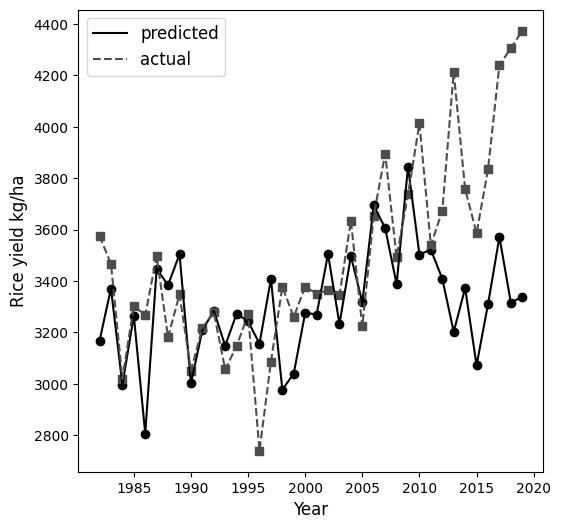

In [31]:

tr = [ 0 , 2, 3 , 5 , 6,  7,  8,  9, 10, 11, 13, 14, 15, 18, 19, 20, 21, 22, 23, 25, 26]
tt = [ 1 , 4 , 12 , 16, 17, 24]
x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
print(tr,tt)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
model = LinearRegression().fit(X_train, y_train)

x_ = df_test[selected_features_final]
y_ = df_test['prod']
y_pred_ = model.predict(scaler.transform(x_))

rmse_test = float(format(np.sqrt(mean_squared_error(y_pred_, y_)), '.3f'))
print("\nRMSE test: ", rmse_test)

rrmse_test = format(float(rmse_test*100/np.mean(y_)),'.2f')

print("\nRRMSE test: ", rrmse_test,"%")
x__=df[selected_features_final]
y__=df['prod']
y__pred__=model.predict(scaler.transform(x__))

plt.figure(figsize=(6,6))
plt.scatter(df['year'], y__pred__,color='k')
plt.plot(df['year'],y__pred__,color='k',label='predicted')
plt.scatter(df['year'],y__,color='0.3', marker='s')
plt.plot(df['year'],y__,color='0.3',label='actual',linestyle='dashed')

plt.legend(fontsize='12')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Rice yield kg/ha',fontsize=12)
plt.savefig("KG_LR_full.jpg",dpi=1200)
plt.show()

test_acc['Method'][0]='Linear Regression'
test_acc['RMSE test'][0]=rmse_test
test_acc['RRMSE test'][0]=rrmse_test
test_acc['MAE test'][0]=float(format(mean_absolute_error(y_pred_, y_), '.3f'))
test_acc['R2_score test'][0]=r2_score(y_,y_pred_)
test_acc['Bias test'][0]=bias_value(y_,y_pred_)

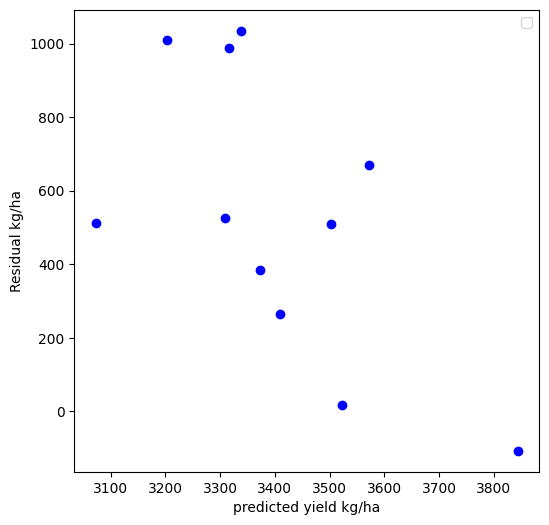

In [32]:
x_val = df_test[selected_features_final]
y_val = df_test['prod']
y_pred_val = model.predict(scaler.transform(x_val))

plt.figure(figsize=(6,6))
plt.scatter(y_pred_val, y_val-y_pred_val, color='b')
#plt.plot(df_test['year'], y_-y_pred_,color='b')
plt.xlabel("predicted yield kg/ha")
plt.ylabel("Residual kg/ha")
plt.legend()
plt.savefig("KG_LR_res.jpg",dpi=1200)

plt.show()

##SVR

[ 1  2  3  4  5  6  7 10 12 14 15 16 17 18 19 20 22 23 24 25 26] [ 0  8  9 11 13 21]
[ 0  2  3  5  6  7  8  9 10 11 13 14 15 18 19 20 21 22 23 25 26] [ 1  4 12 16 17 24]
[ 0  1  4  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 23 24 25 26] [ 2  3  5 15 22]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 21 22 24] [18 20 23 25 26]
[ 0  1  2  3  4  5  8  9 11 12 13 15 16 17 18 20 21 22 23 24 25 26] [ 6  7 10 14 19]


<BarContainer object of 5 artists>

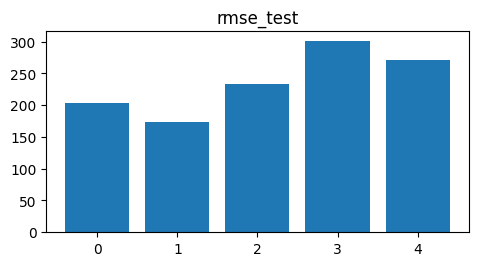

In [33]:


cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through CV splits
rmse_test_arr = []
rrmse_test_arr =[]
r2_test_arr= []
mae_test_arr = []

rmse_train_arr = []
rrmse_train_arr =[]
r2_train_arr= []
mae_train_arr = []

bias_test_arr = []
bias_train_arr = []


for tr, tt in cv.split(df_train): #tr,tt are indexes
    x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
    y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
    print(tr,tt)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(x_train)
    X_test = scaler.transform(x_test)
    model = SVR().fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    r2_test=r2_score(y_test,y_pred)
    r2_train=r2_score(y_train,y_pred_train)
    #print(r2_test)
    #print(r2_train)
    r2_test_arr.append(r2_test)
    r2_train_arr.append(r2_train)

    rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    #print("\nRMSE test: ", rmse_test)
    rmse_test_arr.append(rmse_test)

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    #print("\nRRMSE test: ", rrmse_test,"%")
    rrmse_test_arr.append(rrmse_test)

    rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
    #print("\nRMSE train: ", rmse_train)
    rmse_train_arr.append(rmse_train)

    rrmse_train = format(float(rmse_train*100/np.mean(y_train)),'.2f')
    #print("\nRRMSE train: ", rrmse_train,"%")
    rrmse_train_arr.append(rrmse_train)


    mae_test = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
    #print("\nMAE Test: ", mae_test)
    mae_test_arr.append(mae_test)
    mae_train = float(format(mean_absolute_error(y_train, y_pred_train), '.3f'))
    #print("\nMAE Train: ", mae_train)
    mae_train_arr.append(mae_train)

                #print("\nBias Test: \n", bias_value(y_test,y_pred))
    bias_test_arr.append(bias_value(y_test,y_pred))
    #print("\nBias Train: \n", bias_value(y_train, y_pred_train))
    bias_train_arr.append(bias_value(y_train, y_pred_train))

data['Method'][1]='SVR'
data['RMSE test'][1]=np.mean(rmse_test_arr)
data['RMSE train'][1]=np.mean(rmse_train_arr)
data['RRMSE test'][1]=np.mean(np.array(rrmse_test_arr).astype(np.float64))
data['RRMSE train'][1]=np.mean(np.array(rrmse_train_arr).astype(np.float64))
data['MAE test'][1]=np.mean(mae_test_arr)
data['MAE train'][1]=np.mean(mae_train_arr)
data['R2_score test'][1]=np.mean(r2_test_arr)
data['R2_score train'][1]=np.mean(r2_train_arr)
data['Bias test'][1]=np.mean(bias_test_arr)
data['Bias train'][1]=np.mean(bias_train_arr)

plt.figure(figsize=(12,12))
plt.subplot(4, 2, 1)
plt.title("rmse_test")
plt.bar([x for x in [0,1,2,3,4]],[rmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 2)
# plt.title("rmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 3)
# plt.title("rrmse_test")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 4)
# plt.title("rrmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 5)
# plt.title("r2_test")
# plt.bar([x for x in [0,1,2,3,4]],[r2_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 6)
# plt.title("r2_train")
# plt.bar([x for x in [0,1,2,3,4]],[r2_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 7)
# plt.title("mae_test")
# plt.bar([x for x in [0,1,2,3,4]],[mae_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 8)
# plt.title("mae_train")
# plt.bar([x for x in [0,1,2,3,4]],[mae_train_arr[x] for x in [0,1,2,3,4]])
# plt.show()



In [34]:
tr = [ 0 , 1 , 4, 6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26]
tt = [ 2 , 3 , 5, 15, 22]
x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
print(tr,tt)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
model = SVR().fit(X_train, y_train)

x_ = df_test[selected_features_final]
y_ = df_test['prod']
y_pred_ = model.predict(scaler.transform(x_))

rmse_test = float(format(np.sqrt(mean_squared_error(y_pred_, y_)), '.3f'))
print("\nRMSE test: ", rmse_test)

rrmse_test = format(float(rmse_test*100/np.mean(y_)),'.2f')
print("\nRRMSE test: ", rrmse_test,"%")


test_acc['Method'][1]='SVR'
test_acc['RMSE test'][1]=rmse_test
test_acc['RRMSE test'][1]=rrmse_test
test_acc['MAE test'][1]=float(format(mean_absolute_error(y_pred_, y_), '.3f'))
test_acc['R2_score test'][1]=r2_score(y_,y_pred_)
test_acc['Bias test'][1]=bias_value(y_,y_pred_)

[0, 1, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26] [2, 3, 5, 15, 22]

RMSE test:  686.656

RRMSE test:  17.46 %


##MLP

[ 1  2  3  4  5  6  7 10 12 14 15 16 17 18 19 20 22 23 24 25 26] [ 0  8  9 11 13 21]
[ 0  2  3  5  6  7  8  9 10 11 13 14 15 18 19 20 21 22 23 25 26] [ 1  4 12 16 17 24]
[ 0  1  4  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 23 24 25 26] [ 2  3  5 15 22]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 21 22 24] [18 20 23 25 26]
[ 0  1  2  3  4  5  8  9 11 12 13 15 16 17 18 20 21 22 23 24 25 26] [ 6  7 10 14 19]


<BarContainer object of 5 artists>

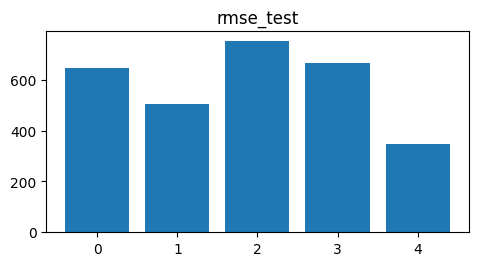

In [35]:

cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through CV splits
rmse_test_arr = []
rrmse_test_arr =[]
r2_test_arr= []
mae_test_arr = []

rmse_train_arr = []
rrmse_train_arr =[]
r2_train_arr= []
mae_train_arr = []

bias_test_arr = []
bias_train_arr = []


for tr, tt in cv.split(df_train): #tr,tt are indexes
    x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
    y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
    scaler = MinMaxScaler()
    print(tr,tt)
    X_train = scaler.fit_transform(x_train)
    X_test = scaler.transform(x_test)
    model = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000).fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    r2_test=r2_score(y_test,y_pred)
    r2_train=r2_score(y_train,y_pred_train)
    #print(r2_test)
    #print(r2_train)
    r2_test_arr.append(r2_test)
    r2_train_arr.append(r2_train)

    rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    #print("\nRMSE test: ", rmse_test)
    rmse_test_arr.append(rmse_test)

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    #print("\nRRMSE test: ", rrmse_test,"%")
    rrmse_test_arr.append(rrmse_test)

    rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
    #print("\nRMSE train: ", rmse_train)
    rmse_train_arr.append(rmse_train)

    rrmse_train = format(float(rmse_train*100/np.mean(y_train)),'.2f')
    #print("\nRRMSE train: ", rrmse_train,"%")
    rrmse_train_arr.append(rrmse_train)


    mae_test = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
    #print("\nMAE Test: ", mae_test)
    mae_test_arr.append(mae_test)
    mae_train = float(format(mean_absolute_error(y_train, y_pred_train), '.3f'))
    #print("\nMAE Train: ", mae_train)
    mae_train_arr.append(mae_train)

                #print("\nBias Test: \n", bias_value(y_test,y_pred))
    bias_test_arr.append(bias_value(y_test,y_pred))
    #print("\nBias Train: \n", bias_value(y_train, y_pred_train))
    bias_train_arr.append(bias_value(y_train, y_pred_train))

data['Method'][2]='MLP'
data['RMSE test'][2]=np.mean(rmse_test_arr)
data['RMSE train'][2]=np.mean(rmse_train_arr)
data['RRMSE test'][2]=np.mean(np.array(rrmse_test_arr).astype(np.float64))
data['RRMSE train'][2]=np.mean(np.array(rrmse_train_arr).astype(np.float64))
data['MAE test'][2]=np.mean(mae_test_arr)
data['MAE train'][2]=np.mean(mae_train_arr)
data['R2_score test'][2]=np.mean(r2_test_arr)
data['R2_score train'][2]=np.mean(r2_train_arr)
data['Bias test'][2]=np.mean(bias_test_arr)
data['Bias train'][2]=np.mean(bias_train_arr)

plt.figure(figsize=(12,12))
plt.subplot(4, 2, 1)
plt.title("rmse_test")
plt.bar([x for x in [0,1,2,3,4]],[rmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 2)
# plt.title("rmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 3)
# plt.title("rrmse_test")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 4)
# plt.title("rrmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 5)
# plt.title("r2_test")
# plt.bar([x for x in [0,1,2,3,4]],[r2_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 6)
# plt.title("r2_train")
# plt.bar([x for x in [0,1,2,3,4]],[r2_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 7)
# plt.title("mae_test")
# plt.bar([x for x in [0,1,2,3,4]],[mae_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 8)
# plt.title("mae_train")
# plt.bar([x for x in [0,1,2,3,4]],[mae_train_arr[x] for x in [0,1,2,3,4]])
# plt.show()



[0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 18, 19, 20, 21, 22, 23, 25, 26] [1, 4, 12, 16, 17, 24]

RMSE test:  952.445

RRMSE test:  24.21 %


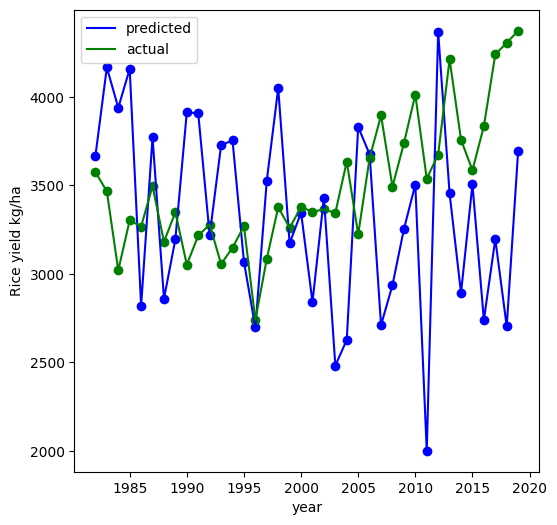

In [36]:
tr = [ 0, 2,  3, 5, 6, 7,  8,  9, 10, 11, 13, 14, 15, 18, 19, 20, 21, 22, 23, 25, 26]
tt = [ 1, 4, 12, 16, 17, 24]
x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
print(tr,tt)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
model = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000).fit(X_train, y_train)

x_ = df_test[selected_features_final]
y_ = df_test['prod']
y_pred_ = model.predict(scaler.transform(x_))

rmse_test = float(format(np.sqrt(mean_squared_error(y_pred_, y_)), '.3f'))
print("\nRMSE test: ", rmse_test)

rrmse_test = format(float(rmse_test*100/np.mean(y_)),'.2f')
print("\nRRMSE test: ", rrmse_test,"%")

x__=df[selected_features_final]
y__=df['prod']
y__pred__=model.predict(scaler.transform(x__))

plt.figure(figsize=(6,6))
plt.scatter(df['year'], y__pred__,color='b')
plt.plot(df['year'],y__pred__,color='b',label='predicted')
plt.scatter(df['year'],y__,color='g')
plt.plot(df['year'],y__,color='g',label='actual')
plt.xlabel("year")
plt.ylabel("Rice yield kg/ha")
plt.legend()
plt.show()

test_acc['Method'][2]='MLP'
test_acc['RMSE test'][2]=rmse_test
test_acc['RRMSE test'][2]=rrmse_test
test_acc['MAE test'][2]=float(format(mean_absolute_error(y_pred_, y_), '.3f'))
test_acc['R2_score test'][2]=r2_score(y_,y_pred_)
test_acc['Bias test'][2]=bias_value(y_,y_pred_)

##KNN

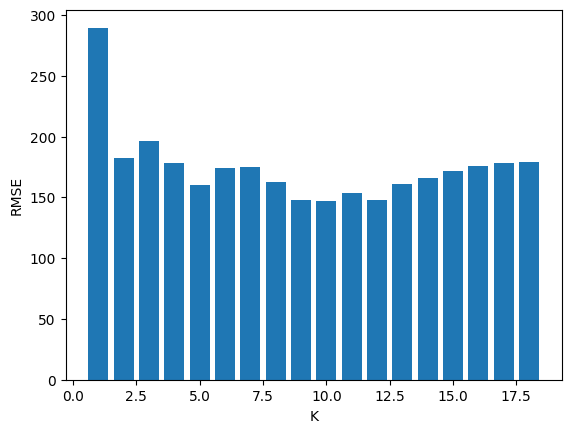

10


In [37]:
X=df_train[selected_features_final]
y=df_train['prod']

x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
K_min = 0
RMSE_min=math.inf
RMSE_list=[0 for t in range(len(x_train))]

for K in range(1,len(x_train)+1):
    model = neighbors.KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_pred= model.predict(X_test)
    rmse_test = float(format(np.sqrt(mean_squared_error(y_pred, y_test)), '.3f'))

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    RMSE_list[K-1]=rmse_test
    if RMSE_min > rmse_test:
      RMSE_min = rmse_test
      K_min = K
plt.bar(np.arange(1,len(x_train)+1), RMSE_list)
plt.xlabel("K")
plt.ylabel("RMSE")
plt.show()

print(K_min)

[ 0  8  9 11 13 21] [ 1  2  3  4  5  6  7 10 12 14 15 16 17 18 19 20 22 23 24 25 26]
[ 1  4 12 16 17 24] [ 0  2  3  5  6  7  8  9 10 11 13 14 15 18 19 20 21 22 23 25 26]
[ 2  3  5 15 22] [ 0  1  4  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 23 24 25 26]
[18 20 23 25 26] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 21 22 24]
[ 6  7 10 14 19] [ 0  1  2  3  4  5  8  9 11 12 13 15 16 17 18 20 21 22 23 24 25 26]


<BarContainer object of 5 artists>

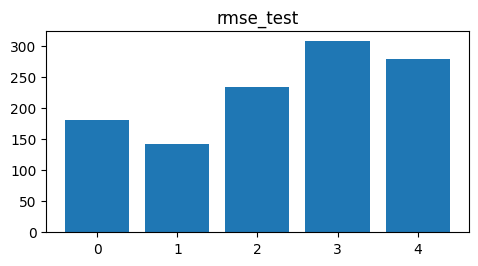

In [38]:


cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through CV splits
rmse_test_arr = []
rrmse_test_arr =[]
r2_test_arr= []
mae_test_arr = []

rmse_train_arr = []
rrmse_train_arr =[]
r2_train_arr= []
mae_train_arr = []

bias_test_arr = []
bias_train_arr = []

K = K_min
for tr, tt in cv.split(df_train): #tr,tt are indexes
    x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
    y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
    print(tt,tr)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(x_train)
    X_test = scaler.transform(x_test)

    model = neighbors.KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    r2_test=r2_score(y_test,y_pred)
    r2_train=r2_score(y_train,y_pred_train)
    #print(r2_test)
    #print(r2_train)
    r2_test_arr.append(r2_test)
    r2_train_arr.append(r2_train)

    rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    #print("\nRMSE test: ", rmse_test)
    rmse_test_arr.append(rmse_test)

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    #print("\nRRMSE test: ", rrmse_test,"%")
    rrmse_test_arr.append(rrmse_test)

    rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
    #print("\nRMSE train: ", rmse_train)
    rmse_train_arr.append(rmse_train)

    rrmse_train = format(float(rmse_train*100/np.mean(y_train)),'.2f')
    #print("\nRRMSE train: ", rrmse_train,"%")
    rrmse_train_arr.append(rrmse_train)


    mae_test = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
    #print("\nMAE Test: ", mae_test)
    mae_test_arr.append(mae_test)
    mae_train = float(format(mean_absolute_error(y_train, y_pred_train), '.3f'))
    #print("\nMAE Train: ", mae_train)
    mae_train_arr.append(mae_train)

                #print("\nBias Test: \n", bias_value(y_test,y_pred))
    bias_test_arr.append(bias_value(y_test,y_pred))
    #print("\nBias Train: \n", bias_value(y_train, y_pred_train))
    bias_train_arr.append(bias_value(y_train, y_pred_train))

data['Method'][3]='KNN'
data['RMSE test'][3]=np.mean(rmse_test_arr)
data['RMSE train'][3]=np.mean(rmse_train_arr)
data['RRMSE test'][3]=np.mean(np.array(rrmse_test_arr).astype(np.float64))
data['RRMSE train'][3]=np.mean(np.array(rrmse_train_arr).astype(np.float64))
data['MAE test'][3]=np.mean(mae_test_arr)
data['MAE train'][3]=np.mean(mae_train_arr)
data['R2_score test'][3]=np.mean(r2_test_arr)
data['R2_score train'][3]=np.mean(r2_train_arr)
data['Bias test'][3]=np.mean(bias_test_arr)
data['Bias train'][3]=np.mean(bias_train_arr)

plt.figure(figsize=(12,12))
plt.subplot(4, 2, 1)
plt.title("rmse_test")
plt.bar([x for x in [0,1,2,3,4]],[rmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 2)
# plt.title("rmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 3)
# plt.title("rrmse_test")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 4)
# plt.title("rrmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 5)
# plt.title("r2_test")
# plt.bar([x for x in [0,1,2,3,4]],[r2_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 6)
# plt.title("r2_train")
# plt.bar([x for x in [0,1,2,3,4]],[r2_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 7)
# plt.title("mae_test")
# plt.bar([x for x in [0,1,2,3,4]],[mae_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 8)
# plt.title("mae_train")
# plt.bar([x for x in [0,1,2,3,4]],[mae_train_arr[x] for x in [0,1,2,3,4]])
# plt.show()



[1, 2, 3, 4, 5, 6, 7, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23] [0, 8, 9, 11, 13, 21]

RMSE test:  734.683

RRMSE test:  18.68 %


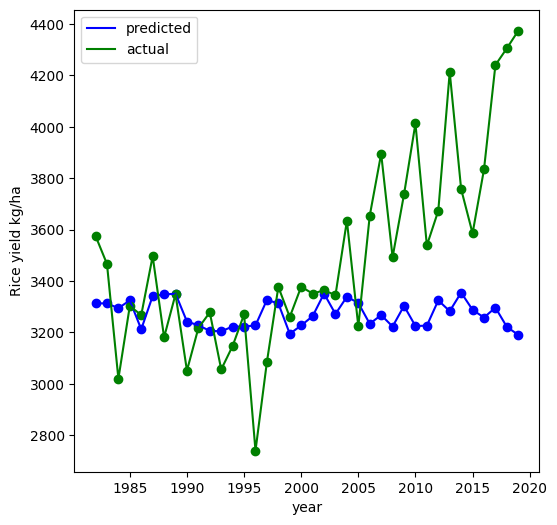

In [39]:
tr = [ 1,2,3,4 , 5 , 6,  7, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23]
tt = [ 0,8,9,11,13,21]
x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
print(tr,tt)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

model = neighbors.KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
x_ = df_test[selected_features_final]
y_ = df_test['prod']
y_pred_ = model.predict(scaler.transform(x_))

rmse_test = float(format(np.sqrt(mean_squared_error(y_pred_, y_)), '.3f'))
print("\nRMSE test: ", rmse_test)

rrmse_test = format(float(rmse_test*100/np.mean(y_)),'.2f')
print("\nRRMSE test: ", rrmse_test,"%")
x__=df[selected_features_final]
y__=df['prod']
y__pred__=model.predict(scaler.transform(x__))

plt.figure(figsize=(6,6))
plt.scatter(df['year'], y__pred__,color='b')
plt.plot(df['year'],y__pred__,color='b',label='predicted')
plt.scatter(df['year'],y__,color='g')
plt.plot(df['year'],y__,color='g',label='actual')
plt.xlabel("year")
plt.ylabel("Rice yield kg/ha")
plt.legend()
plt.savefig("AM_KNN_full.jpg",dpi=1200)
plt.show()

test_acc['Method'][3]='KNN'
test_acc['RMSE test'][3]=rmse_test
test_acc['RRMSE test'][3]=rrmse_test
test_acc['MAE test'][3]=float(format(mean_absolute_error(y_pred_, y_), '.3f'))
test_acc['R2_score test'][3]=r2_score(y_,y_pred_)
test_acc['Bias test'][3]=bias_value(y_,y_pred_)

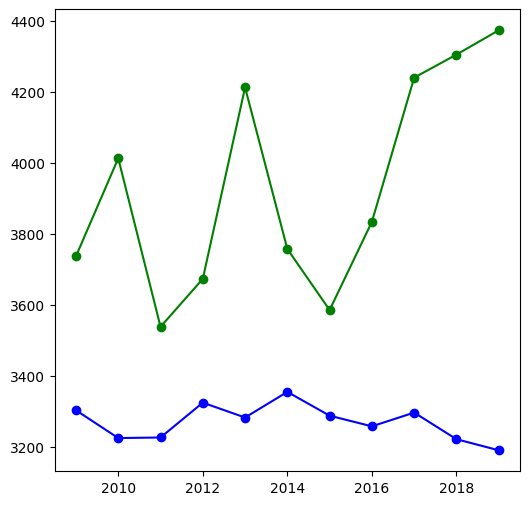

In [40]:

plt.figure(figsize=(6,6))
plt.scatter(df_test['year'], y_pred_,color='b')
plt.plot(df_test['year'],y_pred_,color='b')
plt.scatter(df_test['year'],y_,color='g')
plt.plot(df_test['year'],y_,color='g')
plt.savefig("AM_KNN_pred.jpg",dpi=1200)
plt.show()


##Random Forest

In [41]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through CV splits
rmse_test_arr = []
rrmse_test_arr =[]
r2_test_arr= []
mae_test_arr = []

rmse_train_arr = []
rrmse_train_arr =[]
r2_train_arr= []
mae_train_arr = []

bias_test_arr = []
bias_train_arr = []

for tr, tt in cv.split(df_train): #tr,tt are indexes
    x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
    y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
    print(tr,tt)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(pd.DataFrame(x_train))
    X_test = scaler.transform(pd.DataFrame(x_test))
    model =  RandomForestRegressor(n_estimators = 1000, random_state = 42).fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    r2_test=r2_score(y_test,y_pred)
    r2_train=r2_score(y_train,y_pred_train)
    #print(r2_test)
    #print(r2_train)
    r2_test_arr.append(r2_test)
    r2_train_arr.append(r2_train)

    rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    #print("\nRMSE test: ", rmse_test)
    rmse_test_arr.append(rmse_test)

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    #print("\nRRMSE test: ", rrmse_test,"%")
    rrmse_test_arr.append(rrmse_test)

    rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
    #print("\nRMSE train: ", rmse_train)
    rmse_train_arr.append(rmse_train)

    rrmse_train = format(float(rmse_train*100/np.mean(y_train)),'.2f')
    #print("\nRRMSE train: ", rrmse_train,"%")
    rrmse_train_arr.append(rrmse_train)


    mae_test = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
    #print("\nMAE Test: ", mae_test)
    mae_test_arr.append(mae_test)
    mae_train = float(format(mean_absolute_error(y_train, y_pred_train), '.3f'))
    #print("\nMAE Train: ", mae_train)
    mae_train_arr.append(mae_train)

    #print("\nBias Test: \n", bias_value(y_test,y_pred))
    bias_test_arr.append(bias_value(y_test,y_pred))
    #print("\nBias Train: \n", bias_value(y_train, y_pred_train))
    bias_train_arr.append(bias_value(y_train, y_pred_train))

data['Method'][4]='Random Forest'
data['RMSE test'][4]=np.mean(rmse_test_arr)
data['RMSE train'][4]=np.mean(rmse_train_arr)
data['RRMSE test'][4]=np.mean(np.array(rrmse_test_arr).astype(np.float64))
data['RRMSE train'][4]=np.mean(np.array(rrmse_train_arr).astype(np.float64))
data['MAE test'][4]=np.mean(mae_test_arr)
data['MAE train'][4]=np.mean(mae_train_arr)
data['R2_score test'][4]=np.mean(r2_test_arr)
data['R2_score train'][4]=np.mean(r2_train_arr)
data['Bias test'][4]=np.mean(bias_test_arr)
data['Bias train'][4]=np.mean(bias_train_arr)

print(np.array(rmse_test_arr).astype(np.float64))
print(sum(np.array(rmse_test_arr))/5)
x_train, x_test = df_train[selected_features_final], df_test[selected_features_final]
y_train, y_test = df_train['prod'], df_test['prod']

X_train = scaler.fit_transform(pd.DataFrame(x_train))
X_test = scaler.transform(pd.DataFrame(x_test))
#model =  RandomForestRegressor(n_estimators = 1000, random_state = 42).fit(X_train, y_train)
y_pred= model.predict(X_test)
rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print(rmse_test)

[ 1  2  3  4  5  6  7 10 12 14 15 16 17 18 19 20 22 23 24 25 26] [ 0  8  9 11 13 21]
[ 0  2  3  5  6  7  8  9 10 11 13 14 15 18 19 20 21 22 23 25 26] [ 1  4 12 16 17 24]
[ 0  1  4  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 23 24 25 26] [ 2  3  5 15 22]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 21 22 24] [18 20 23 25 26]
[ 0  1  2  3  4  5  8  9 11 12 13 15 16 17 18 20 21 22 23 24 25 26] [ 6  7 10 14 19]
[196.221  95.448 224.186 286.571 323.745]
225.23420000000002
614.677


[0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 18, 19, 20, 21, 22, 23, 25, 26] [1, 4, 12, 16, 17, 24]

RMSE test:  681.79

RRMSE test:  17.33 %


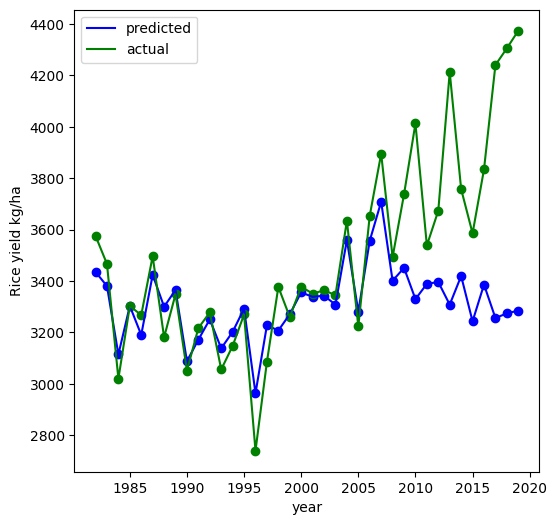

In [42]:
tr = [ 0,  2,  3,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15, 18, 19, 20, 21, 22, 23, 25, 26]
tt = [ 1,  4, 12, 16, 17, 24]

x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
print(tr,tt)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
model =  RandomForestRegressor(n_estimators = 1000, random_state = 42).fit(X_train, y_train)
x_ = df_test[selected_features_final]
y_ = df_test['prod']
y_pred_ = model.predict(scaler.transform(x_))

rmse_test = float(format(np.sqrt(mean_squared_error(y_pred_, y_)), '.3f'))
print("\nRMSE test: ", rmse_test)

rrmse_test = format(float(rmse_test*100/np.mean(y_)),'.2f')
print("\nRRMSE test: ", rrmse_test,"%")

x__=df[selected_features_final]
y__=df['prod']
y__pred__=model.predict(scaler.transform(x__))

plt.figure(figsize=(6,6))
plt.scatter(df['year'], y__pred__,color='b')
plt.plot(df['year'],y__pred__,color='b',label='predicted')
plt.scatter(df['year'],y__,color='g')
plt.plot(df['year'],y__,color='g',label='actual')
plt.xlabel("year")
plt.ylabel("Rice yield kg/ha")
plt.legend()
plt.savefig("AM_RF_full.jpg",dpi=1200)
plt.show()

test_acc['Method'][4]='RF'
test_acc['RMSE test'][4]=rmse_test
test_acc['RRMSE test'][4]=rrmse_test
test_acc['MAE test'][4]=float(format(mean_absolute_error(y_pred_, y_), '.3f'))
test_acc['R2_score test'][4]=r2_score(y_,y_pred_)
test_acc['Bias test'][4]=bias_value(y_,y_pred_)

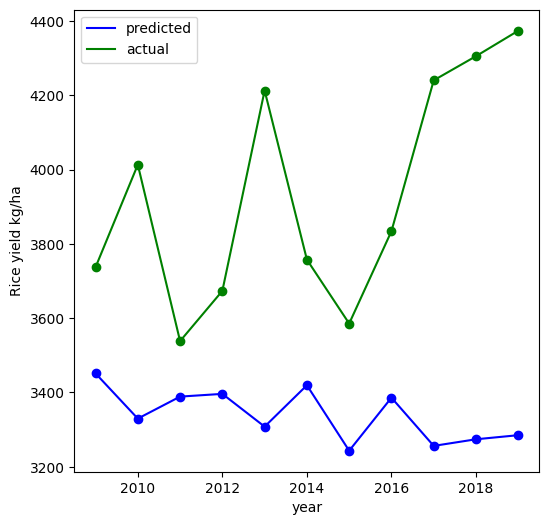

In [43]:
plt.figure(figsize=(6,6))
plt.scatter(df_test['year'], y_pred_,color='b')
plt.plot(df_test['year'],y_pred_,color='b',label='predicted')
plt.scatter(df_test['year'],y_,color='g')
plt.plot(df_test['year'],y_,color='g',label='actual')
plt.xlabel("year")
plt.ylabel("Rice yield kg/ha")
plt.legend()
plt.savefig("AM_RF_pred.jpg",dpi=1200)

plt.show()

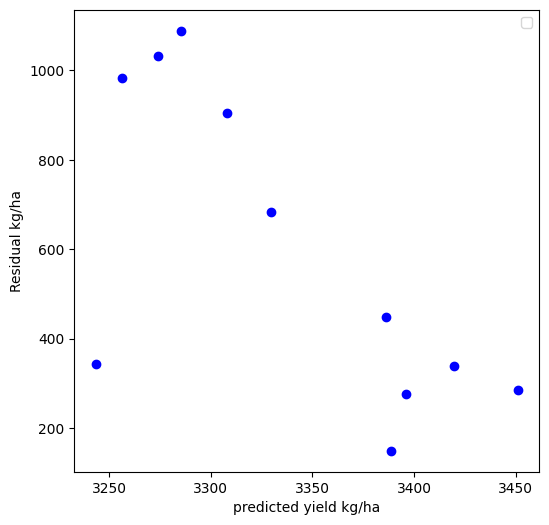

In [44]:
x_val = df_test[selected_features_final]
y_val = df_test['prod']
y_pred_val = model.predict(scaler.transform(x_val))

plt.figure(figsize=(6,6))
plt.scatter(y_pred_val, y_val-y_pred_val, color='b')
#plt.plot(df_test['year'], y_-y_pred_,color='b')
plt.xlabel("predicted yield kg/ha")
plt.ylabel("Residual kg/ha")
plt.legend()
plt.savefig("KT_RF_res.jpg",dpi=1200)

plt.show()

# Results

In [45]:
df_train = pd.DataFrame(data, columns = ['Method', 'RMSE test','RMSE train','RRMSE test','RRMSE train','MAE test','MAE train','R2_score test','R2_score train','Bias test','Bias train'])
print("dataset: ", dataset)
print("test size : ",test_size,",", test_size*100/len(df.index),"%")
print(df_train)

dataset:  Kurunegala full dataset
test size :  11 , 28.94736842105263 %
              Method  RMSE test  RMSE train  RRMSE test  RRMSE train  \
0  Linear Regression   289.2886    165.1670       8.756        4.984   
1                SVR   236.5012    226.1488       7.134        6.824   
2                MLP   583.8302    572.7550      17.564       17.278   
3                KNN   229.1996    210.4496       6.916        6.350   
4      Random Forest   225.2342     85.8852       6.818        2.592   

   MAE test  MAE train  R2_score test  R2_score train  Bias test    Bias train  
0  230.1680   121.0852      -1.042132        0.465040   8.824592  2.756045e-14  
1  179.0196   167.8626      -0.306516        0.004205   2.167787  1.708523e+00  
2  494.1104   467.7286      -7.709943       -5.414565 -28.828973 -3.958014e+01  
3  168.9974   152.6282      -0.217281        0.137649   3.661333  5.870606e+00  
4  181.1368    65.9708      -0.205160        0.855874   4.001967 -2.239158e+00  


In [46]:
test_acc_df = pd.DataFrame(test_acc, columns = ['Method', 'RMSE test','RRMSE test','MAE test', 'R2_score test','Bias test'])
print(test_acc_df)

              Method  RMSE test RRMSE test  MAE test  R2_score test  \
0  Linear Regression    642.809      16.34   547.632      -3.865297   
1                SVR    686.656      17.46   621.735      -4.551686   
2                MLP    952.445      24.21   849.474      -9.681353   
3                KNN    734.683      18.68   663.413      -5.355453   
4                 RF    681.790      17.33   593.772      -4.473271   

    Bias test  
0  528.120080  
1  621.734536  
2  723.397648  
3  663.412786  
4  593.771968  


In [48]:
df_train.to_csv(r'KT_feature_engineered_train.csv', index = False, header=True)
test_acc_df.to_csv(r'KT_feature_engineered_test.csv',index=False, header=True)